In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split



from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow import keras
import shap

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
data = pd.read_csv('Normalised_NBA_Real_HalfTime_Data.csv')

data.head()

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,2P_PCT,PPM,POSSESSIONS,PTSperP,EFGPCT,PACE,HOME,Scoring_Opportunities,Defensive_Index,TO_to_AST_Ratio
0,0,0.636364,0.666667,0.800000,0.420,0.444444,0.56250,0.400,0.304348,0.357143,...,0.500,0.633188,0.805556,0.319452,0.403715,0.805333,1,0.666667,0.633333,0.666667
1,1,0.509091,0.428571,0.885714,0.345,0.000000,0.00000,0.286,0.347826,0.392857,...,0.358,0.506550,0.694444,0.295203,0.115300,0.694667,1,0.333333,0.333333,0.642857
2,0,0.381818,0.428571,0.542857,0.442,0.277778,0.46875,0.294,0.260870,0.214286,...,0.538,0.379913,0.583333,0.266737,0.346244,0.583333,1,0.285714,0.500000,0.571429
3,1,0.545455,0.571429,0.514286,0.524,0.444444,0.50000,0.444,0.260870,0.535714,...,0.583,0.545852,0.555556,0.387454,0.524140,0.555333,0,0.500000,0.400000,0.538462
4,1,0.454545,0.428571,0.771429,0.373,0.277778,0.71875,0.200,0.434783,0.464286,...,0.538,0.454148,0.805556,0.219821,0.229046,0.805333,1,0.833333,0.533333,0.692308


In [3]:
# Spliting the data into training and testing sets:
X = data.drop('WL', axis=1)
y = data['WL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1110, 31), (278, 31), (1110,), (278,))

In [5]:
# Define the model function
def create_model(learning_rate=0.0001):
    model = keras.Sequential([
        keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'precision', 'recall', 'AUC'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [8, 16, 32, 64],
    'epochs': [10, 25, 50, 100]
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Hyperparameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)     

c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best Hyperparameters: {'batch_size': 64, 'epochs': 50, 'model__learning_rate': 0.01}
Best Accuracy: 0.7243243243243244


In [6]:
# Evaluate the best model on the test set
model = grid_result.best_estimator_.model_

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.7230215827338129
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       144
           1       0.70      0.74      0.72       134

    accuracy                           0.72       278
   macro avg       0.72      0.72      0.72       278
weighted avg       0.72      0.72      0.72       278



In [7]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8088 - accuracy: 0.7308 - loss: 0.5205 - precision: 0.7031 - recall: 0.7477  


[0.5592347979545593,
 0.7230215668678284,
 0.7021276354789734,
 0.7388059496879578,
 0.7833747863769531]

In [8]:
yp = model.predict(X_test)
yp[:10]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.9719826 ],
       [0.37077197],
       [0.31899744],
       [0.06774678],
       [0.30272025],
       [0.6083734 ],
       [0.54806817],
       [0.6339679 ],
       [0.65864694],
       [0.9700015 ]], dtype=float32)

In [9]:
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       144
           1       0.70      0.74      0.72       134

    accuracy                           0.72       278
   macro avg       0.72      0.72      0.72       278
weighted avg       0.72      0.72      0.72       278



Text(95.72222222222221, 0.5, 'Truths')

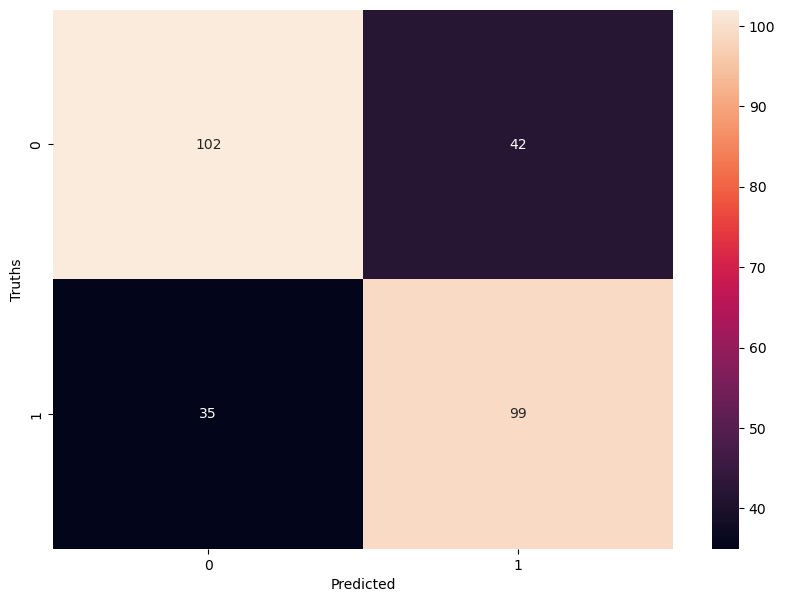

In [11]:
cm = tf.math.confusion_matrix(labels = y_test , predictions= y_pred)
plt.figure(figsize= (10 , 7))
sns.heatmap(cm , annot=True , fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truths")

c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


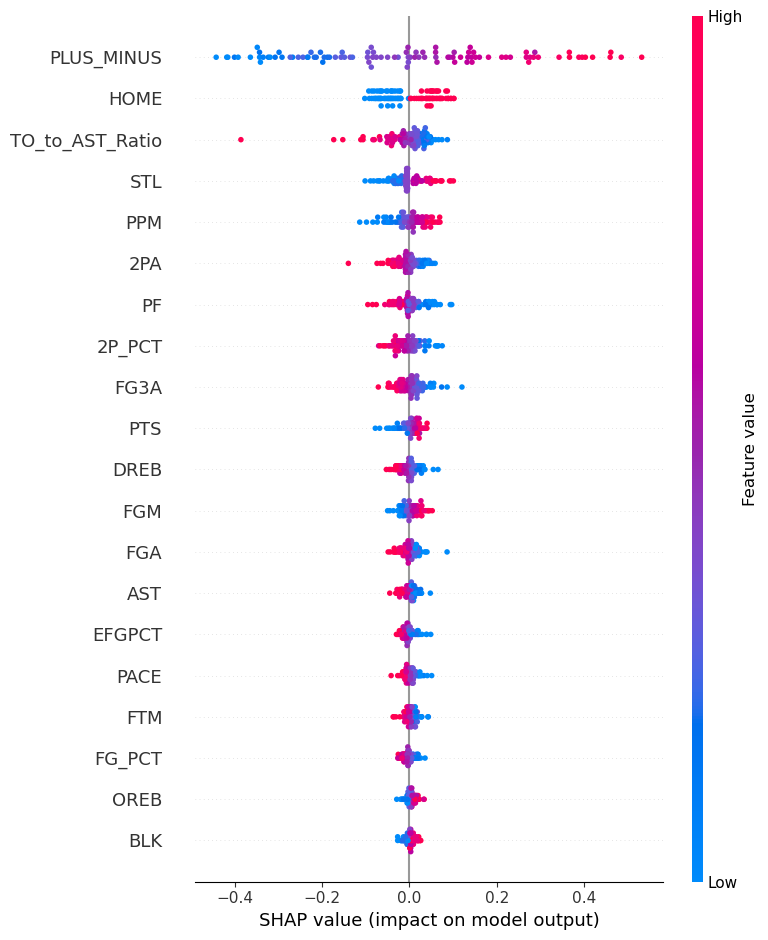

TypeError: Object of type EagerTensor is not JSON serializable

In [12]:
# Ensure feature_names matches the column order in X_train
feature_names = X_train.columns.tolist()



# SHAP Analysis
from tqdm import tqdm
import shap
# Function to make predictions
# Function to make predictions and ensure NumPy array outputs
def model_predict(X):
    return model.predict(X).flatten().astype(float)  # Ensure output is NumPy array


# Ensure X_test is in the correct format
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.values  # Convert to NumPy array if it's a DataFrame
else:
    X_test_array = X_test  # Already a NumPy array

# Select background data for SHAP
if isinstance(X_train, pd.DataFrame):
    background_data = X_train.sample(100, random_state=42).values
else:
    background_data = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Initialize SHAP explainer
explainer = shap.DeepExplainer(model, background_data)

# Ensure all SHAP inputs are NumPy arrays
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.values  # Convert DataFrame to NumPy array
else:
    X_test_array = X_test

# Generate SHAP values for all rows in X_test_array[:100]
shap_values = explainer.shap_values(X_test_array[:100])

# If shap_values is a list, extract the first element
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Reshape SHAP values to remove any extra dimensions
shap_values = shap_values.squeeze()  # Converts shape (100, 28, 1) to (100, 28)

# Visualize SHAP results
shap.summary_plot(shap_values, X_test_array[:100], feature_names=feature_names)

# Ensure NumPy arrays for force plot
shap.force_plot(
    explainer.expected_value[0], 
    shap_values[0], 
    X_test_array[0], 
    feature_names=feature_names
)

In [13]:
# Reduction of Dataset to match the SHAP values in the model:

reduced_data = data[["WL","PLUS_MINUS","HOME","TO_to_AST_Ratio","STL","PPM","2PA","PF","2P_PCT","FG3A","PTS",
                     "DREB","FGM","FGA","AST","EFGPCT"]]

reduced_data.head()

,WL,PLUS_MINUS,HOME,TO_to_AST_Ratio,STL,PPM,2PA,PF,2P_PCT,FG3A,PTS,DREB,FGM,FGA,AST,EFGPCT
0,0,0.585366,1,0.666667,0.615385,0.633188,0.522727,0.500000,0.500,0.56250,0.636364,0.636364,0.666667,0.800000,0.666667,0.403715
1,1,0.414634,1,0.642857,0.384615,0.506550,1.000000,0.333333,0.358,0.00000,0.509091,0.272727,0.428571,0.885714,0.476190,0.115300
2,0,0.390244,1,0.571429,0.307692,0.379913,0.386364,0.444444,0.538,0.46875,0.381818,0.454545,0.428571,0.542857,0.476190,0.346244
3,1,0.609756,0,0.538462,0.384615,0.545852,0.340909,0.277778,0.583,0.50000,0.545455,0.500000,0.571429,0.514286,0.428571,0.524140
4,1,0.548780,1,0.692308,0.692308,0.454148,0.386364,0.777778,0.538,0.71875,0.454545,0.409091,0.428571,0.771429,0.428571,0.229046


In [14]:
X = reduced_data.drop('WL', axis=1)
y = reduced_data['WL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((1110, 15), (278, 15), (1110,), (278,))

In [16]:
# Define the model function
def create_model(learning_rate=0.0001):
    model = keras.Sequential([
        keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'precision', 'recall', 'AUC'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [8, 16, 32, 64],
    'epochs': [10, 25, 50, 100]
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Hyperparameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)     

c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best Hyperparameters: {'batch_size': 64, 'epochs': 50, 'model__learning_rate': 0.01}
Best Accuracy: 0.7252252252252253


In [17]:
# Evaluate the best model on the test set
model = grid_result.best_estimator_.model_

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.7050359712230215
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       144
           1       0.69      0.69      0.69       134

    accuracy                           0.71       278
   macro avg       0.70      0.70      0.70       278
weighted avg       0.71      0.71      0.71       278



In [19]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8065 - accuracy: 0.7012 - loss: 0.5243 - precision: 0.6815 - recall: 0.6926  


[0.5436908602714539,
 0.7050359845161438,
 0.6940298676490784,
 0.6940298676490784,
 0.7906560897827148]

In [20]:
yp = model.predict(X_test)
yp[:10]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.92414594],
       [0.33240354],
       [0.285071  ],
       [0.1642383 ],
       [0.32996395],
       [0.64371   ],
       [0.35146207],
       [0.6178509 ],
       [0.4093324 ],
       [0.97762805]], dtype=float32)

In [21]:
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[1, 0, 0, 0, 0, 1, 0, 1, 0, 1]

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       144
           1       0.69      0.69      0.69       134

    accuracy                           0.71       278
   macro avg       0.70      0.70      0.70       278
weighted avg       0.71      0.71      0.71       278



Text(95.72222222222221, 0.5, 'Truths')

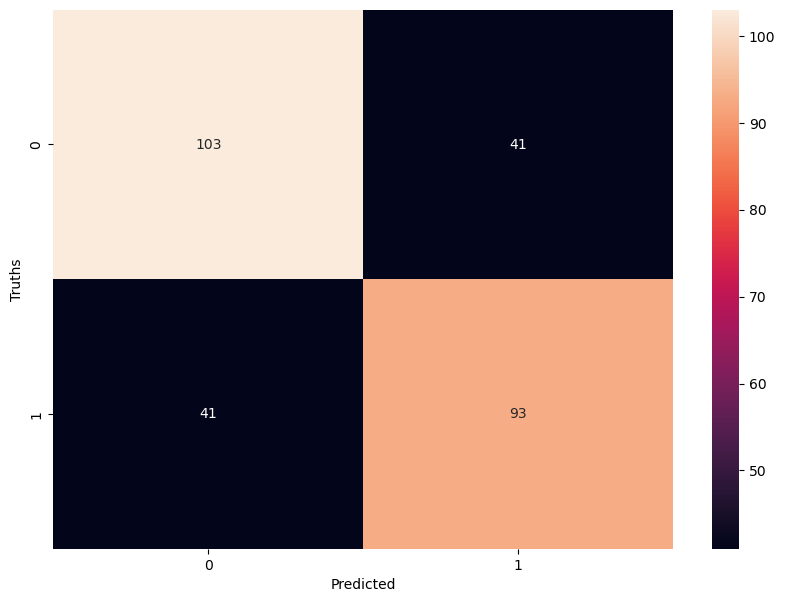

In [23]:
cm = tf.math.confusion_matrix(labels = y_test , predictions= y_pred)
plt.figure(figsize= (10 , 7))
sns.heatmap(cm , annot=True , fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truths")

c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


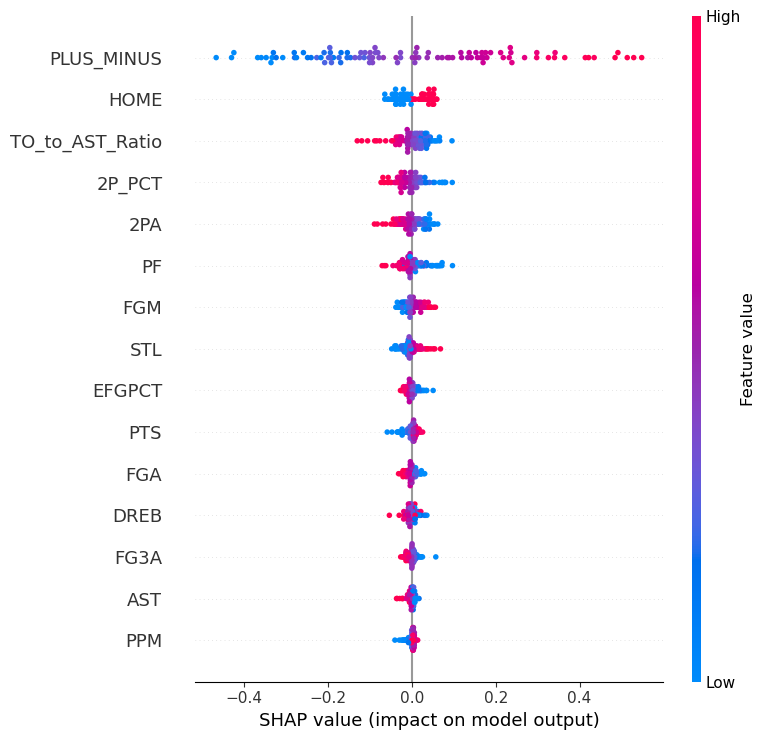

TypeError: Object of type EagerTensor is not JSON serializable

In [24]:
# Ensure feature_names matches the column order in X_train
feature_names = X_train.columns.tolist()



# SHAP Analysis
from tqdm import tqdm
import shap
# Function to make predictions
# Function to make predictions and ensure NumPy array outputs
def model_predict(X):
    return model.predict(X).flatten().astype(float)  # Ensure output is NumPy array


# Ensure X_test is in the correct format
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.values  # Convert to NumPy array if it's a DataFrame
else:
    X_test_array = X_test  # Already a NumPy array

# Use all of X_train as background data for SHAP
if isinstance(X_train, pd.DataFrame):
    background_data = X_train.values  # Use all rows, converted to NumPy array
else:
    background_data = X_train 

# Initialize SHAP explainer
explainer = shap.DeepExplainer(model, background_data)

# Ensure all SHAP inputs are NumPy arrays
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.values  # Convert DataFrame to NumPy array
else:
    X_test_array = X_test

# Generate SHAP values for all rows in X_test_array[:100]
shap_values = explainer.shap_values(X_test_array[:100])

# If shap_values is a list, extract the first element
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Reshape SHAP values to remove any extra dimensions
shap_values = shap_values.squeeze()  # Converts shape (100, 28, 1) to (100, 28)

# Visualize SHAP results
shap.summary_plot(shap_values, X_test_array[:100], feature_names=feature_names)

# Ensure NumPy arrays for force plot
shap.force_plot(
    explainer.expected_value[0], 
    shap_values[0], 
    X_test_array[0], 
    feature_names=feature_names
)